# Includes Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

# Load Data Set

In [5]:
df = pd.read_excel('./OLX_Car_Data.xlsx')
dff = df[:500]

# Describe Hole Data Info

In [6]:
dff.describe()
dff.sample()

,Brand,Condition,Fuel,KMs_Driven,Model,Price,Registered_City,Transaction_Type,Year
182,Daihatsu,Used,CNG,78000.0,Terios Kid,700000,Karachi,Cash,2000.0


# Drop Un Important Column

In [7]:
columns = ['Registered_City','Transaction_Type']
dff.drop(columns, inplace=True, axis=1)
dff.sample()

,Brand,Condition,Fuel,KMs_Driven,Model,Price,Year
379,Suzuki,New,CNG,5000.0,Bolan,520000,2007.0


# Drop All NaN Tuples

In [8]:
new_df=dff.dropna()
new_df.sample()

,Brand,Condition,Fuel,KMs_Driven,Model,Price,Year
289,Honda,Used,Petrol,150000.0,Civic EXi,820000,2004.0


# Checking The Null Values

In [9]:
new_df.isnull().sum()

Brand         0
Condition     0
Fuel          0
KMs_Driven    0
Model         0
Price         0
Year          0
dtype: int64

# Convert KMs_Driven Column Float values in Int

In [10]:
new_df.KMs_Driven = new_df.KMs_Driven.apply(int)
new_df.sample()

,Brand,Condition,Fuel,KMs_Driven,Model,Price,Year
192,Suzuki,Used,Petrol,70000,Cultus VXR,830000,2012.0


# Convert Year Column Float values in Int

In [11]:
new_df.Year = new_df.Year.apply(int)
new_df.sample()

,Brand,Condition,Fuel,KMs_Driven,Model,Price,Year
385,Suzuki,Used,Petrol,42500,Wagon R,1025000,2016


# Print After Scanning Data

In [12]:
new_df.head()

,Brand,Condition,Fuel,KMs_Driven,Model,Price,Year
0,Toyota,Used,Diesel,1,Prado,2100000,1997
1,Suzuki,Used,Petrol,100000,Bolan,380000,2006
2,Suzuki,Used,CNG,12345,Bolan,340000,1998
3,Suzuki,Used,Petrol,94000,Alto,535000,2010
4,Toyota,Used,Petrol,100000,Corolla XLI,1430000,2013


# Reset Index Of Data Set

In [13]:
new_df.reset_index(drop=True)
new_df.sample()

,Brand,Condition,Fuel,KMs_Driven,Model,Price,Year
205,Suzuki,Used,CNG,50000,Mehran VX,370000,2012


# Count Total Cars Brand

In [14]:
new_df.Brand.value_counts()

Suzuki          220
Toyota          117
Honda            73
Daihatsu         49
Nissan           12
Hyundai           6
Mitsubishi        5
KIA               5
Other Brands      4
Mazda             3
Daewoo            2
Mercedes          1
Chevrolet         1
FAW               1
BMW               1
Name: Brand, dtype: int64

# Apply One Hot Encode on Condition Column And Merged with Data set

In [15]:
def trans_Condition(x):
    if x=='New':
        return 1
    if x=='Used':
        return 2

In [16]:
new_df['Tran_Condition']=new_df['Condition'].apply(trans_Condition)
new_df.sample()

,Brand,Condition,Fuel,KMs_Driven,Model,Price,Year,Tran_Condition
275,Toyota,Used,CNG,99000,Corolla GLI,1135000,2009,2


# Apply One Hot Encode on Fuel Column And Merged with Data set

In [17]:
def trans_Fuel(x):
    if x=='CNG':
        return 1
    if x=='Diesel':
        return 2
    if x=='Hybrid':
        return 3
    if x=='LPG':
        return 4
    if x=='Petrol':
        return 5

In [18]:
new_df['Tran_Fuel']=new_df['Fuel'].apply(trans_Fuel)
new_df

,Brand,Condition,Fuel,KMs_Driven,Model,Price,Year,Tran_Condition,Tran_Fuel
0,Toyota,Used,Diesel,1,Prado,2100000,1997,2,2
1,Suzuki,Used,Petrol,100000,Bolan,380000,2006,2,5
2,Suzuki,Used,CNG,12345,Bolan,340000,1998,2,1
3,Suzuki,Used,Petrol,94000,Alto,535000,2010,2,5
4,Toyota,Used,Petrol,100000,Corolla XLI,1430000,2013,2,5
5,Toyota,Used,Petrol,80000,Corrolla Altis,1620000,2012,2,5
6,Suzuki,New,CNG,65000,Cultus VXL,450000,2006,1,1
7,Toyota,New,Petrol,10241,Corrolla Altis,2900000,2017,1,5
8,Suzuki,Used,CNG,83000,Alto,490000,2009,2,1
9,Honda,Used,Petrol,1,Civic VTi,480000,1997,2,5


# Apply One Hot Encode on Brand Column And Merged with Data set

In [19]:
def trans_Brand(x):
    if x=='Suzuki':
        return 1
    if x=='Toyota':
        return 2
    if x=='Honda':
        return 3
    if x=='Daihatsu':
        return 4
    if x=='Nissan':
        return 5
    if x=='Mitsubishi':
        return 6
    if x=='Hyundai':
        return 7
    if x=='Other Brands':
        return 8
    if x=='KIA':
        return 9
    if x=='Mazda':
        return 10
    if x=='Mercedes':
        return 11
    if x=='FAW':
        return 12
    if x=='Daewoo':
        return 13
    if x=='Chevrolet':
        return 14
    if x=='BMW':
        return 15
    if x=='Lexus':
        return 16
    if x=='Subaru':
        return 17
    if x=='Audi':
        return 18
    if x=='Classic & Antiques':
        return 19
    if x=='Changan':
        return 20
    if x=='Range Rover':
        return 21
    if x=='Porsche':
        return 22
    if x=='Land Rover':
        return 23

In [20]:
new_df['Tran_Brand']=new_df['Brand'].apply(trans_Brand)
new_df

,Brand,Condition,Fuel,KMs_Driven,Model,Price,Year,Tran_Condition,Tran_Fuel,Tran_Brand
0,Toyota,Used,Diesel,1,Prado,2100000,1997,2,2,2
1,Suzuki,Used,Petrol,100000,Bolan,380000,2006,2,5,1
2,Suzuki,Used,CNG,12345,Bolan,340000,1998,2,1,1
3,Suzuki,Used,Petrol,94000,Alto,535000,2010,2,5,1
4,Toyota,Used,Petrol,100000,Corolla XLI,1430000,2013,2,5,2
5,Toyota,Used,Petrol,80000,Corrolla Altis,1620000,2012,2,5,2
6,Suzuki,New,CNG,65000,Cultus VXL,450000,2006,1,1,1
7,Toyota,New,Petrol,10241,Corrolla Altis,2900000,2017,1,5,2
8,Suzuki,Used,CNG,83000,Alto,490000,2009,2,1,1
9,Honda,Used,Petrol,1,Civic VTi,480000,1997,2,5,3


# Drop All Tranformed Column

In [21]:
columns = ['Brand','Condition','Fuel','Model']
new_df.drop(columns, inplace=True, axis=1)
new_df

,KMs_Driven,Price,Year,Tran_Condition,Tran_Fuel,Tran_Brand
0,1,2100000,1997,2,2,2
1,100000,380000,2006,2,5,1
2,12345,340000,1998,2,1,1
3,94000,535000,2010,2,5,1
4,100000,1430000,2013,2,5,2
5,80000,1620000,2012,2,5,2
6,65000,450000,2006,1,1,1
7,10241,2900000,2017,1,5,2
8,83000,490000,2009,2,1,1
9,1,480000,1997,2,5,3


# Ploting Graph

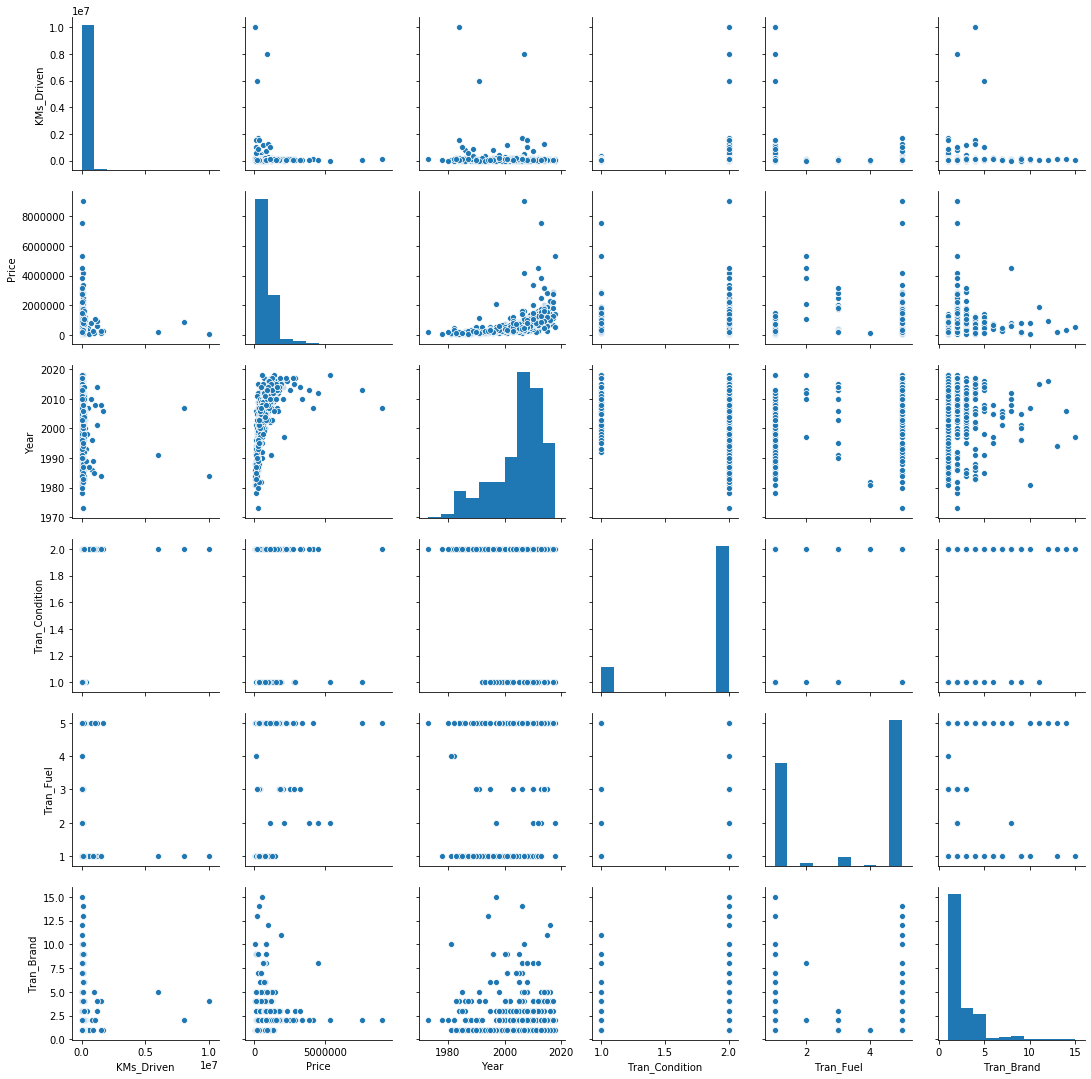

In [22]:
sns.pairplot(new_df)

# Ploting Individual Graph Of Each Attribute

<Figure size 720x720 with 0 Axes>

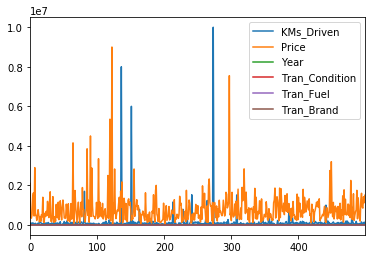

In [23]:
plt.figure(figsize=(10,10))
new_df.plot()

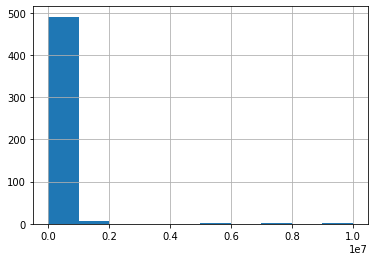

In [24]:
new_df.KMs_Driven.hist()

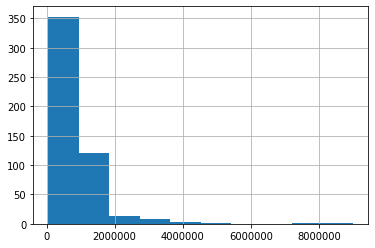

In [25]:
new_df.Price.hist()

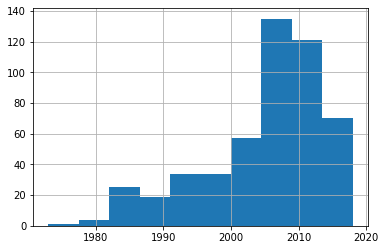

In [26]:
new_df.Year.hist()

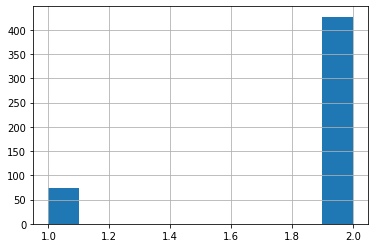

In [27]:
new_df.Tran_Condition.hist()

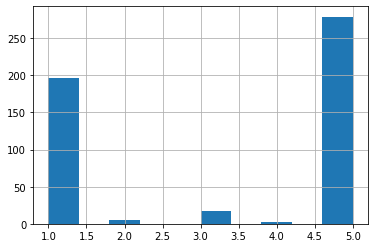

In [28]:
new_df.Tran_Fuel.hist()

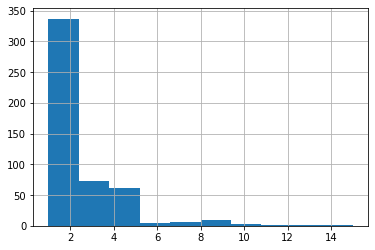

In [29]:
new_df.Tran_Brand.hist()

# Apply Gradient Descent And Cost Functions

In [44]:
x=new_df.drop('Price',axis=1)
y=new_df['Price']

In [45]:
x_train = x[:350]
x_test = x[350:]
y_train = y[:350]
y_test = y[350:]

In [46]:
x_train.sample()

,KMs_Driven,Year,Tran_Condition,Tran_Fuel,Tran_Brand
305,76000,2009,2,5,2


In [47]:
y_train.sample()

262    240000
Name: Price, dtype: int64

In [50]:
def gradient_descent(xa,ya,iterations,learn):
    m=0
    c=0
    learning_rate=learn
    n=len(xa)
        
    for i in range(iterations):       
        y_predicted=m * xa + c        
        cost=(1/2*n) * sum([val**2 for val in (ya-y_predicted)])
        
#         md= -(2/n) * sum(xa*(ya-y_predicted))
#         cd= -(2/n) * sum(ya-y_predicted)
#         m=m - learning_rate * md
#         c=c - learning_rate * cd

        cost = cost - learning_rate * (  (1/n) * sum(ya-y_predicted) )
    return cost  

        #print("m = {},b = {} ,Cost = {},iteration = {}".format(m_curr,b_curr,cost,i))
    

checking and testing ruff work

In [51]:
x_train_km=x_train.iloc[:, 0]
km_m=gradient_descent(x_train_km,y_train,1000,0.01)
print(km_m)
y_predicted=km_m * x_train_km + 0

8.822243866274211e+16


# Testing 

8.822243866274211e+16


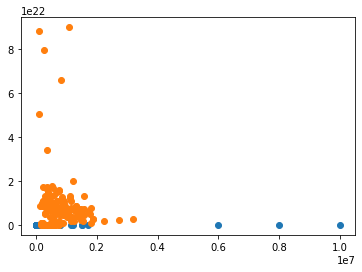

In [57]:
x_train_km=x_train.iloc[:, 0]
x_test_km=x_test.iloc[:, 0]
km_m=gradient_descent(x_train_km,y_train,1000,0.01)
print(km_m)
y_predicted=km_m * x_test_km  + 0
plt.scatter(x_train_km,y_train)
plt.scatter(y_test,y_predicted)
plt.show()

8.822243866274211e+16


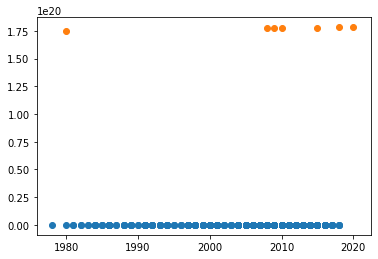

In [62]:
x_train_year=x_train.iloc[:, 1]
x_test_year=x_test.iloc[:, 1]
co_ef=gradient_descent(x_train_year,y_train,1000,0.01)
print(co_ef)
y_predicted=co_ef * x_test_year  + 0
plt.scatter(x_train_year,y_train)
years = np.array([1980,2008,2009,2010,2015,2018,2020])
pred_price=co_ef * years  + 0
plt.scatter(years,pred_price)
plt.show()

32417959.6396 16135.999960000001


In [53]:
x_train=x[:,2]
x2m,x2c=gradient_descent(x_train,y,10000,0.01)
print(x2m,x2c)
y_predicted=x2m * x_train + x2c
plt.scatter(x_train,y)
plt.scatter(x_train,y_predicted)
plt.show()

TypeError: '(slice(None, None, None), 1)' is an invalid key

28798.159920000002 16135.999960000001


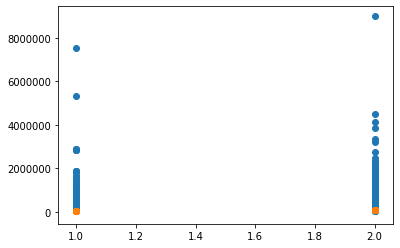

In [91]:
x_train=x[:,2]
x3m,x3c=gradient_descent(x_train,y,10000,0.01)
print(x3m,x3c)
y_predicted=x3m * x_train + x3c
plt.scatter(x_train,y)
plt.scatter(x_train,y_predicted)
plt.show()

63345.839960000005 16135.999960000001


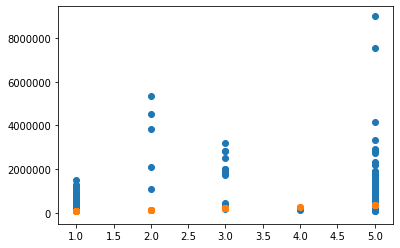

In [92]:
x_train=x[:,3]
x4m,x4c=gradient_descent(x_train,y,10000,0.01)
print(x4m,x4c)
y_predicted=x4m * x_train + x4c
plt.scatter(x_train,y)
plt.scatter(x_train,y_predicted)
plt.show()

39876.479960000004 16135.999960000001


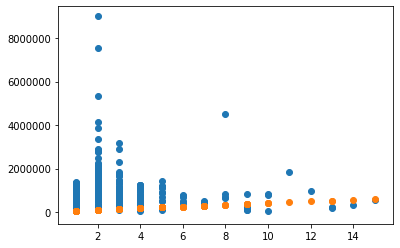

In [93]:
x_train=x[:,4]
x5m,x5c=gradient_descent(x_train,y,10000,0.01)
print(x5m,x5c)
y_predicted=x5m * x_train + x5c
plt.scatter(x_train,y)
plt.scatter(x_train,y_predicted)
plt.show()

# Mean of Attributes

In [94]:
print(x1m,x2m,x3m,x4m,x5m)
c = y - (x1m*x[:,0]) - (x2m*x[:,1]) - (x3m*x[:,2]) - (x4m*x[:,3] - (x5m*x[:,4])
                                                      
cmean = np.mean(c)
print(cmean)
xtrained = (x1m*x[:,0]) + (x2m*x[:,1]) + (x3m*x[:,2]) + (x4m*x[:,3] + (x5m*x[:,4])
y_predicted = xtrained + c
xActual = x[:,0] + x[:,1] + x[:,2] + x[:,3] +x[:,4]
plt.scatter(xActual,y)
plt.scatter(xActual,y_predicted)
plt.show()

SyntaxError: invalid syntax (<ipython-input-94-379ebec60016>, line 3)

In [191]:
print(x1m,x2m,x3m,x4m,x5m)
#c = y - (x1m*x[:,0]) - (x2m*x[:,1]) - (x3m*x[:,2]) - (x4m*x[:,3] - (x5m*x[:,4])
#c  

nan 32417959.6396 28798.159920000002 63345.839960000005 39876.479960000004


# Prediction

In [95]:
Kms_Drived=int(input("How much your car is driven type its KMs : "))
Year=int(input("Type your Car year : "))
Condition=int(input("Type 1 for New Car : Type 2 for Used Car : "))
Fuel_type=int(input("Type 1 for CNG Car : Type 2 for Disel Car : Type 3 for Hybrid Car : Type 4 for LPG Car : Type 5 for Petrol Car :"))

Brand=int(input("Type 1 for Suzuki Car : Type 2 for Toyota Car : Type 3 for Honda Car : Type 4 for Daihatsu Car : Type 5 for Nissan Car : "+
                " Type 6 for Mitsubishi Car : Type 7 for Hyundai Car : Type 8 for Other Brands Car : Type 9 for KIA Car : Type 10 for Mazda Car : "+
                " Type 11 for Mercedes Car : Type 12 for FAW Car : Type 13 for Daewoo Car : Type 14 for Chevrolet Car : Type 15 for BMW Car : "+
                " Type 16 for Lexus Car : Type 17 for Subaru Car : Type 18 for Audi Car : Type 19 for Classic & Antiques Car : Type 20 for Changan Car : "+
                " Type 21 for Range Rover Car : Type 22 for Porsche Car : Type 23 for Land Rover Car : "))

print("The price of Car is : ",0+Kms_Drived*(x1m)+Year*(x2m)+Condition*(x3m)+Fuel_type*(x4m))
 

How much your car is driven type its KMs : 2


KeyboardInterrupt: 